# Optimization Toolkit Demo

This notebook demonstrates the optimization framework with various algorithms and test functions.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from optimizers import SGD, Adam, RMSProp, LBFGS
from test_functions import Rosenbrock, Rastrigin, Sphere, Beale
from visualization import plot_convergence, plot_comparison, plot_landscape, analyze_convergence

%matplotlib inline

## 1. Function Landscapes

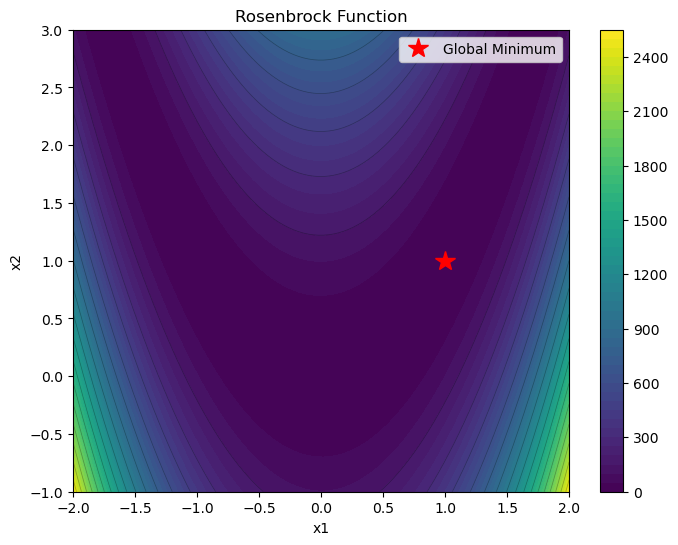

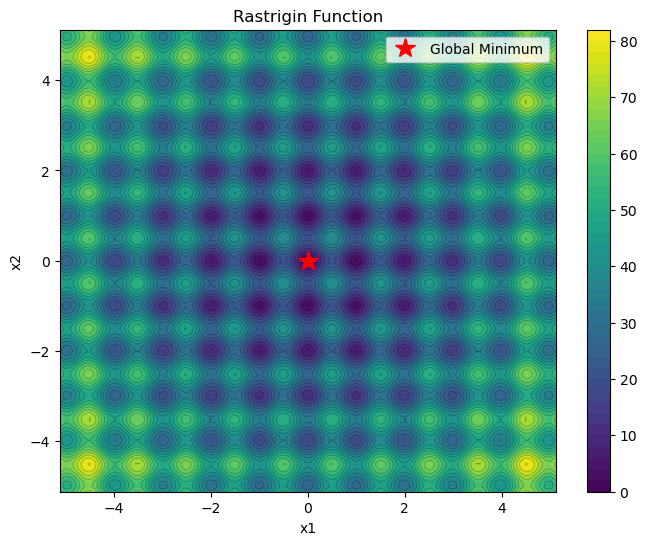

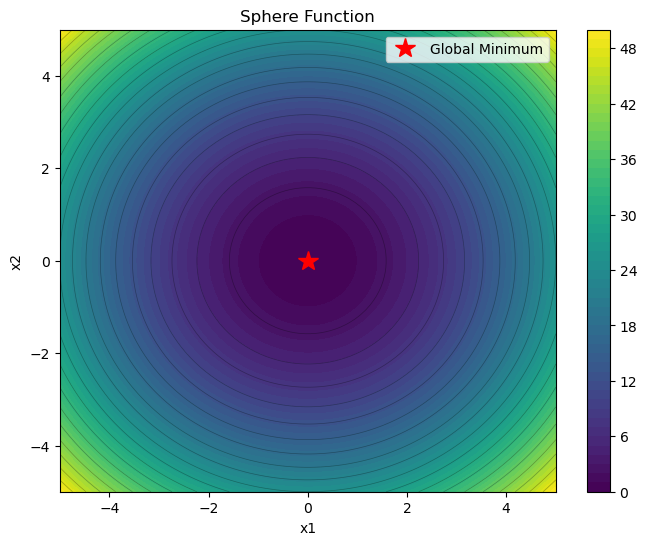

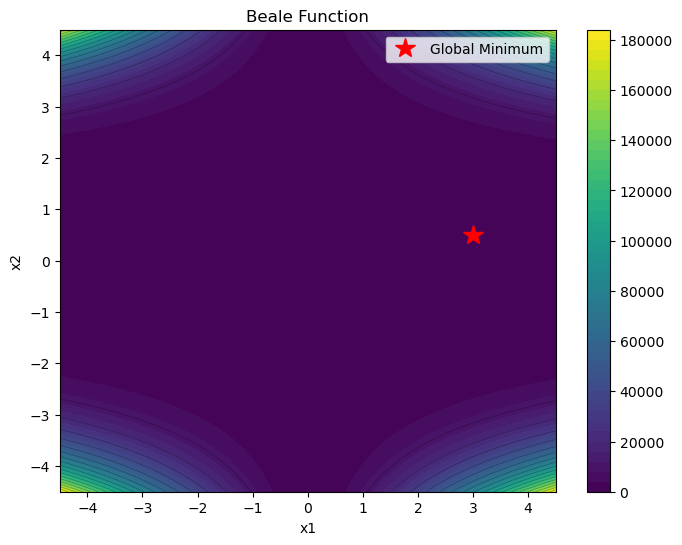

In [8]:
# Visualize different function landscapes
functions = [Rosenbrock(), Rastrigin(), Sphere(), Beale()]

for i, func in enumerate(functions):
    plot_landscape(func)
    plt.title(f'{func.__class__.__name__} Function')
    plt.show()

## 2. Single Optimizer Demo

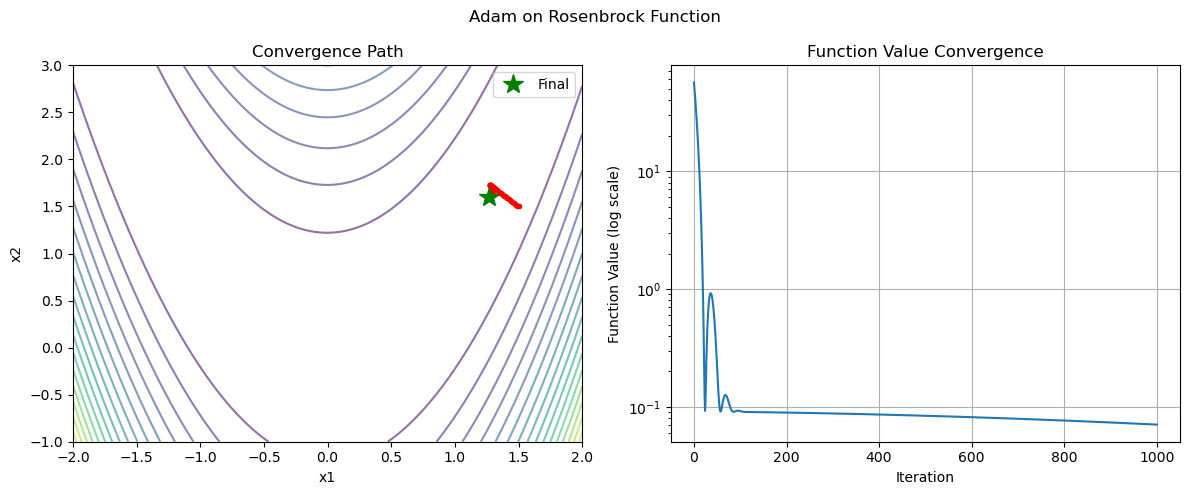

Final point: [1.26601977 1.60352936]
Final value: 0.070819
Iterations: 1001


In [9]:
# Test Adam optimizer on Rosenbrock function
func = Rosenbrock()
optimizer = Adam(lr=0.01, max_iter=1000)
initial_point = np.array([1.5, 1.5])

result = optimizer.minimize(func, initial_point)
plot_convergence(result, func, 'Adam on Rosenbrock Function')
plt.show()

print(f"Final point: {result['x']}")
print(f"Final value: {result['fun']:.6f}")
print(f"Iterations: {result['nit']}")

## 3. Optimizer Comparison

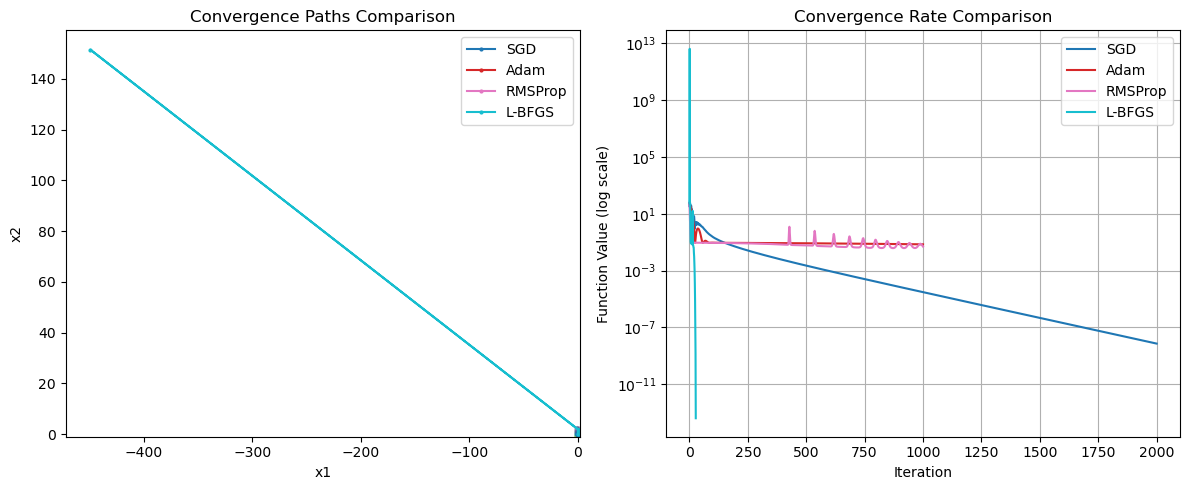

In [10]:
# Compare all optimizers on Rosenbrock function
func = Rosenbrock()
initial_point = np.array([1.5, 1.5])

optimizers = {
    'SGD': SGD(lr=0.001, momentum=0.9, max_iter=2000),
    'Adam': Adam(lr=0.01, max_iter=1000),
    'RMSProp': RMSProp(lr=0.01, max_iter=1000),
    'L-BFGS': LBFGS(lr=1.0, max_iter=500)
}

results = {}
for name, opt in optimizers.items():
    results[name] = opt.minimize(func, initial_point)

plot_comparison(results, func)
plt.show()

## 4. Convergence Analysis

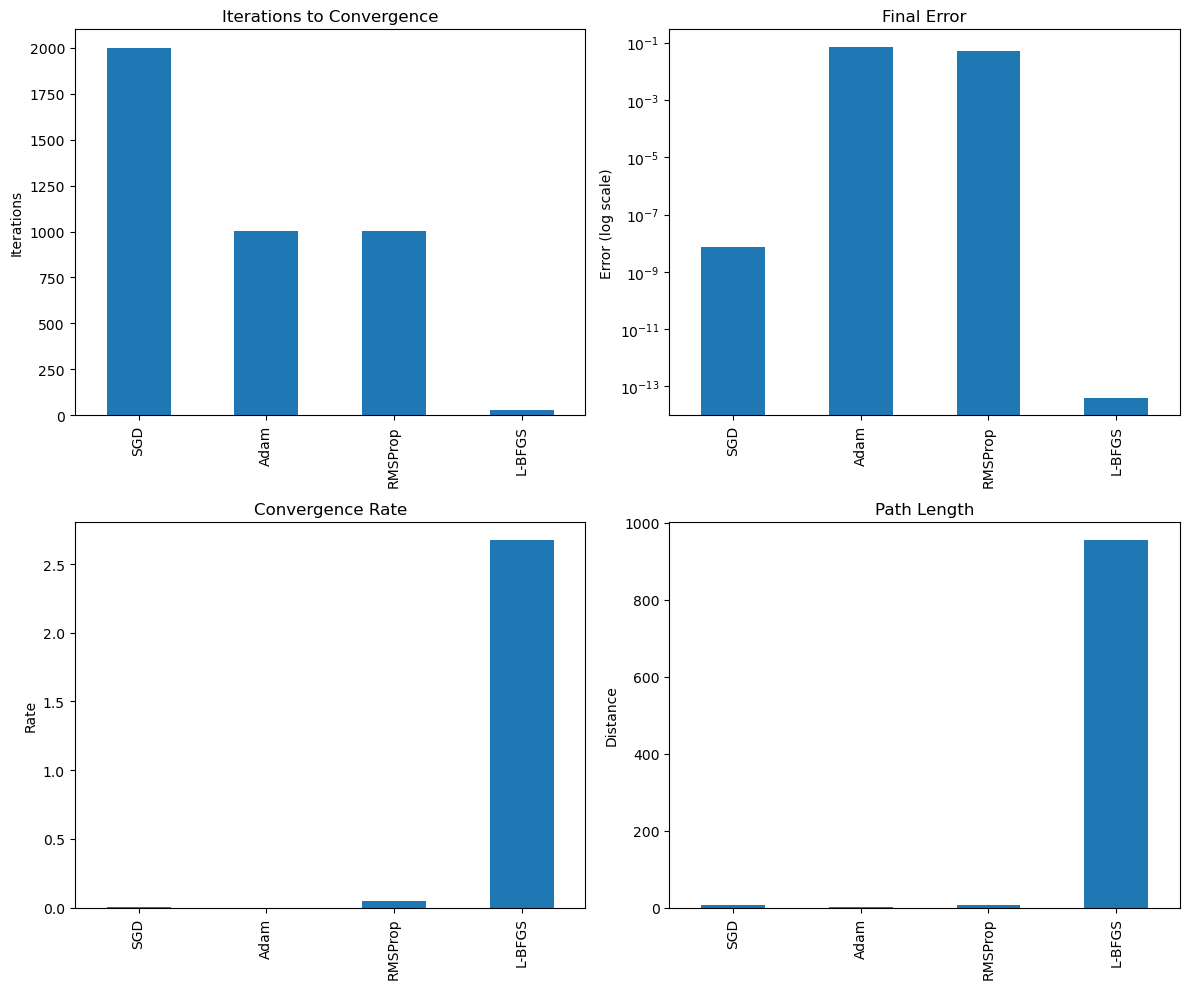


Convergence Analysis:
         iterations   final_value   final_error  convergence_rate  path_length
SGD          2001.0  7.324551e-09  7.324551e-09          0.008317     6.876164
Adam         1001.0  7.081883e-02  7.081883e-02          0.000433     0.469871
RMSProp      1001.0  4.916048e-02  4.916048e-02          0.047864     5.885266
L-BFGS         28.0  4.081037e-14  4.081037e-14          2.673186   955.030147


In [11]:
# Analyze convergence properties
analysis_df, analysis_fig = analyze_convergence(results, func)
plt.show()

print("\nConvergence Analysis:")
print(analysis_df)

## 5. Different Functions Comparison

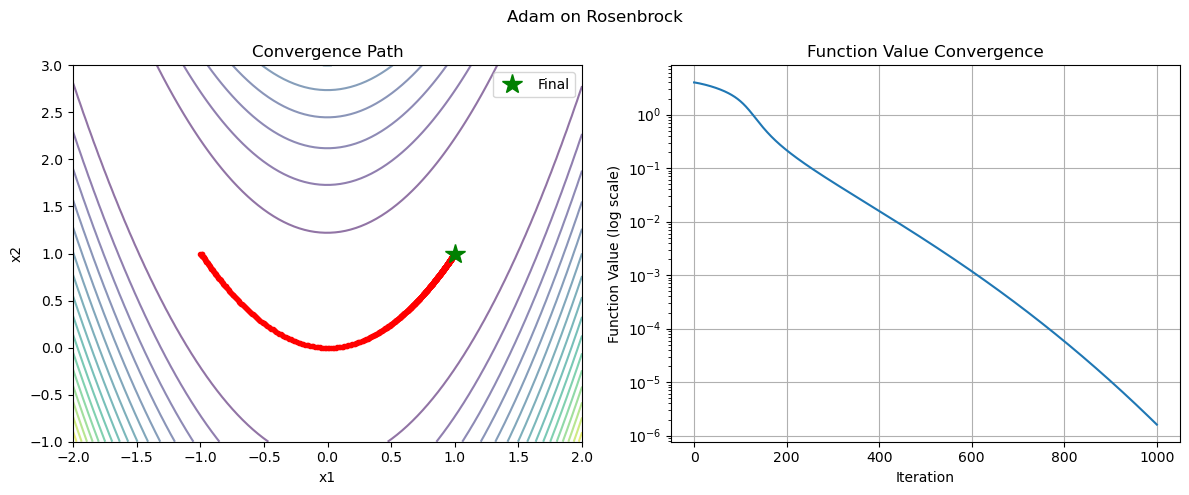

Rosenbrock: Final value = 0.000002, Iterations = 1001


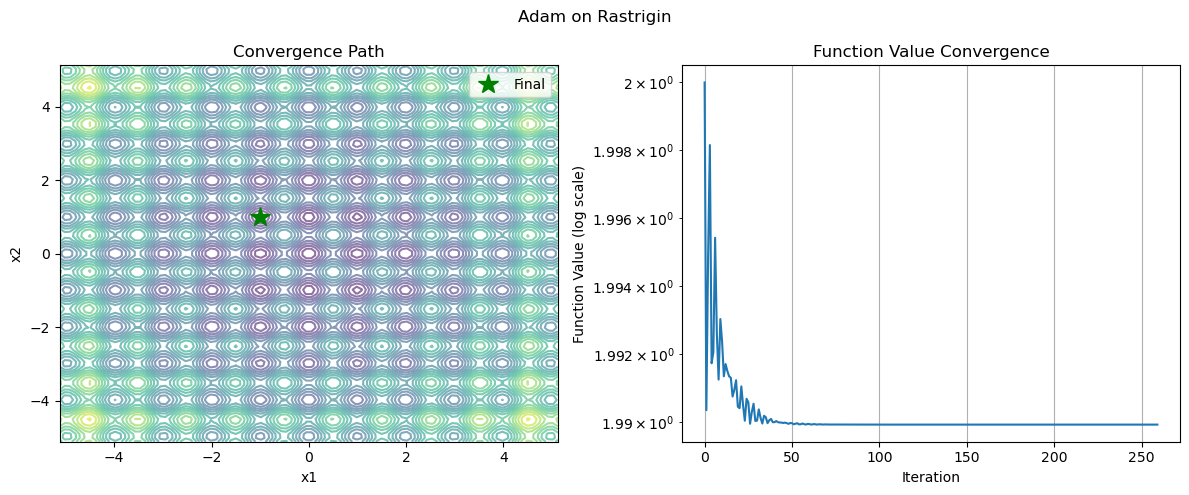

Rastrigin: Final value = 1.989918, Iterations = 260


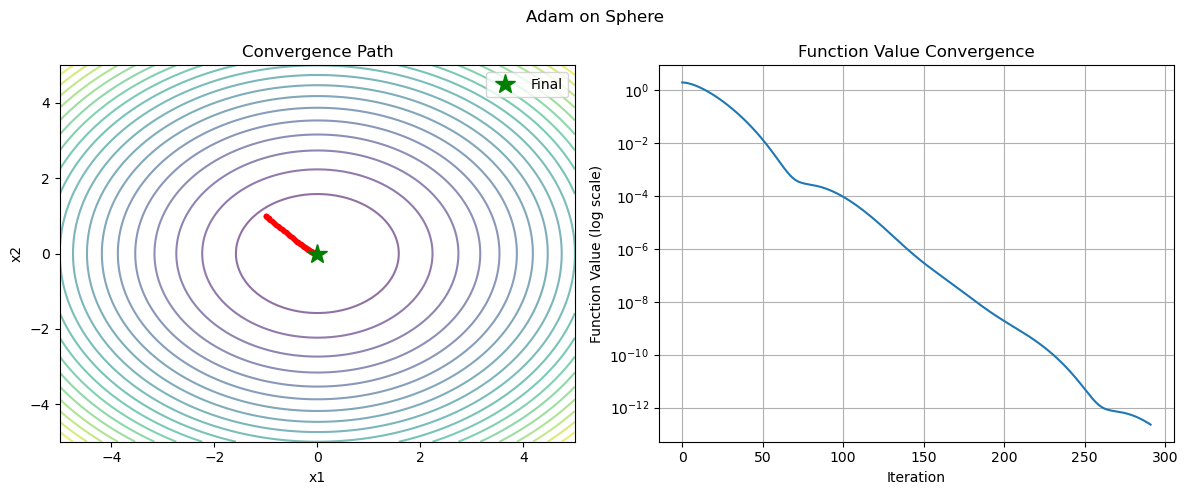

Sphere: Final value = 0.000000, Iterations = 292


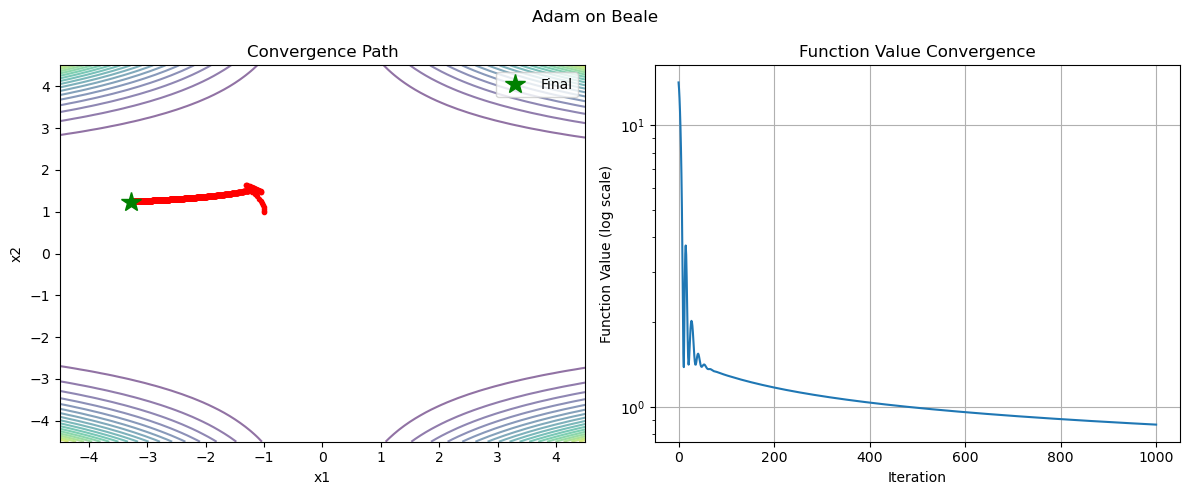

Beale: Final value = 0.863785, Iterations = 1001


In [12]:
# Test Adam on different functions
functions = [Rosenbrock(), Rastrigin(), Sphere(), Beale()]
optimizer = Adam(lr=0.01, max_iter=1000)

for i, func in enumerate(functions):
    initial_point = np.array([-1.0, 1.0])  # Fixed initial point for consistency
    result = optimizer.minimize(func, initial_point)
    
    plot_convergence(result, func, f'Adam on {func.__class__.__name__}')
    plt.show()
    print(f'{func.__class__.__name__}: Final value = {result["fun"]:.6f}, Iterations = {result["nit"]}')